# Project 12 - Popular data science questions

In this guided project, we want to find out what is the "best" content to write about for a company that creates data science content.

## Stack Exchange

Stack Exchange hosts sites on a multitude of fields and subjects (sites like stackoverflow). They also have sites for mathematics, physics, but most importantly - [data science!](https://datascience.stackexchange.com) Data Science Stack Exchange is on the bottom 10 sites when sorted by percentage of questions that received answers, which means that it could be ideal site to investigate to find what to write about.

## Stack Exchange Data Explorer

The website has a [Data Explorer](https://data.stackexchange.com/datascience/query/new) that we can use to find information with using SQL queries.
<pre>
SELECT * 
  FROM tags
 ORDER BY count DESC;
</pre>
    
| Id | TagName | Count | ExcerptPostId | WikiPostId |
|----|---------|-------|---------------|------------|
|2|machine-learning|11468|4909|4908|
|46|python|6728|5523|5522|
|81|neural-network|4905|8885|8884|
|194|deep-learning|4385|8956|8955|
|77|classification|3286|4911|4910|

the table above tells us that the most popular tag in the website is machine-learning with a count of 11468. After that comes python (6728), followed by deep learning (4905). To find popularity of different post types, we can use the following query:
<pre>
SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId;
</pre>
    
This gives us the following table:
|PostTypeId | NrOfPosts |
|-----------|-----------|
|     1     |  21446    |
|     2     |  23673    |
|     4     |  236   |
|     5     |  236    |
|     6     |  11    |
|     7     |  1    |

We can see that type 2 (Questions) is the most popular post type, followed by type 1 (Answers). We will be using these for our project. Our final query to obtain relevant data looks like this
<pre>
    SELECT Id, CreationDate,
           Score, ViewCount,
           Tags, AnswerCount,
           FavoriteCount
      FROM posts
     WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
</pre>
Downloading the table as csv gives us the following result.

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])
print(data.head(5))

      Id        CreationDate  Score  ViewCount  \
0  46453 2019-03-01 09:02:19      2        234   
1  46459 2019-03-01 10:27:30      1         84   
2  49291 2019-04-14 21:13:00      0        360   
3  49286 2019-04-14 19:24:26      1         59   
4  49284 2019-04-14 18:52:17      1         71   

                                               Tags  AnswerCount  \
0                              <deep-learning><cnn>            0   
1                                            <lstm>            0   
2  <python><feature-engineering><anomaly-detection>            0   
3                       <visualization><matplotlib>            0   
4                     <python><matplotlib><seaborn>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


## Exploring the Data

From the sample above we can see that FavoriteCount contains a lot of missing values.

In [177]:
print(data.shape)
print(data.isnull().sum())

(6739, 7)
Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    6580
dtype: int64


There are 6739 rows in our dataset, and 6580 rows have null value in FavoriteCount. This most likely means, that no one marked these questions as their favorite on the website, so there is nothing we can do about it.

In [178]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6739 non-null   int64         
 1   CreationDate   6739 non-null   datetime64[ns]
 2   Score          6739 non-null   int64         
 3   ViewCount      6739 non-null   int64         
 4   Tags           6739 non-null   object        
 5   AnswerCount    6739 non-null   int64         
 6   FavoriteCount  159 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 368.7+ KB
None


From the info above we can see that all columns have correct type. We are going to clean `Tags` into a list of strings, like this: ["deep-learning", "cnn"].

## Cleaning the Data

In [179]:
#Changing null values to 0
data.fillna(0, inplace=True)
print(data.isnull().sum())

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64


In [180]:
#turning tags into list of strings
data["Tags"] = data["Tags"].str.strip("<>").str.split("><")
print(data.sample(3))

         Id        CreationDate  Score  ViewCount  \
4633  62630 2019-11-04 05:27:49      0         27   
438   53664 2019-06-12 19:50:49      1        390   
2247  47499 2019-03-18 07:25:05      1        155   

                                                   Tags  AnswerCount  \
4633                                    [data-analysis]            1   
438   [tensorflow, rnn, transfer-learning, convoluti...            0   
2247             [machine-learning, recommender-system]            1   

      FavoriteCount  
4633            0.0  
438             0.0  
2247            0.0  


## Most Used and Most Viewed

In [181]:
#how many times each tag was used
print(data['Tags'].value_counts())

Tags
[machine-learning]                                                                   86
[python, pandas]                                                                     52
[python]                                                                             41
[nlp]                                                                                36
[r]                                                                                  26
                                                                                     ..
[convolutional-neural-network, class-imbalance, data-augmentation, weighted-data]     1
[deep-learning, time-series, convolution]                                             1
[machine-learning, data-mining, regression, pandas]                                   1
[machine-learning, training, transformer, bert]                                       1
[random-forest, prediction]                                                           1
Name: count, Length: 5051, 

In [182]:
tag_count = {}

for tags in data['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tag_count_df = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count_df.rename(columns={0: "Count"}, inplace=True)
print(tag_count_df.head(10))

                     Count
deep-learning          893
cnn                    378
lstm                   287
python                1439
feature-engineering    130
anomaly-detection       69
visualization          108
matplotlib              63
seaborn                 31
scipy                   33


In [183]:
most_used = tag_count_df.sort_values(by="Count").tail(20)
print(most_used)

                     Count
data-mining            172
feature-selection      176
r                      194
predictive-modeling    211
clustering             229
dataset                245
regression             270
lstm                   287
pandas                 315
time-series            333
cnn                    378
tensorflow             409
nlp                    443
scikit-learn           447
classification         576
keras                  700
neural-network         820
deep-learning          893
python                1439
machine-learning      2124


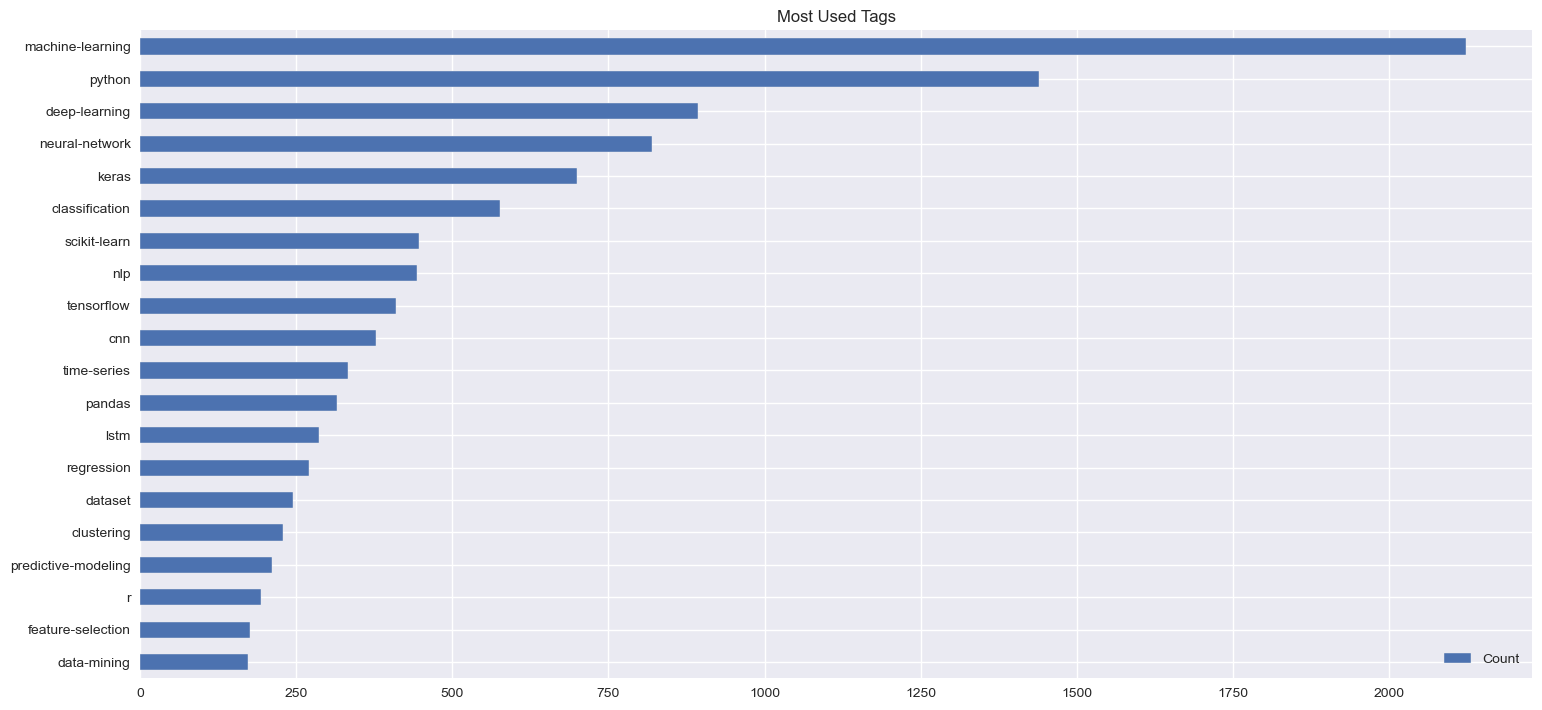

In [200]:
most_used.plot(kind='barh', figsize=(16,8))
plt.title('Most Used Tags')
plt.show()

                   ViewCount
feature-selection     334418
bert                  357418
xgboost               385764
pytorch               421984
regression            438801
numpy                 470925
lstm                  521805
time-series           528089
dataframe             704528
cnn                   787333
nlp                   801379
classification        918989
tensorflow           1042457
scikit-learn         1264088
neural-network       1791146
deep-learning        1896207
keras                1911659
pandas               2055943
machine-learning     3402958
python               4473117


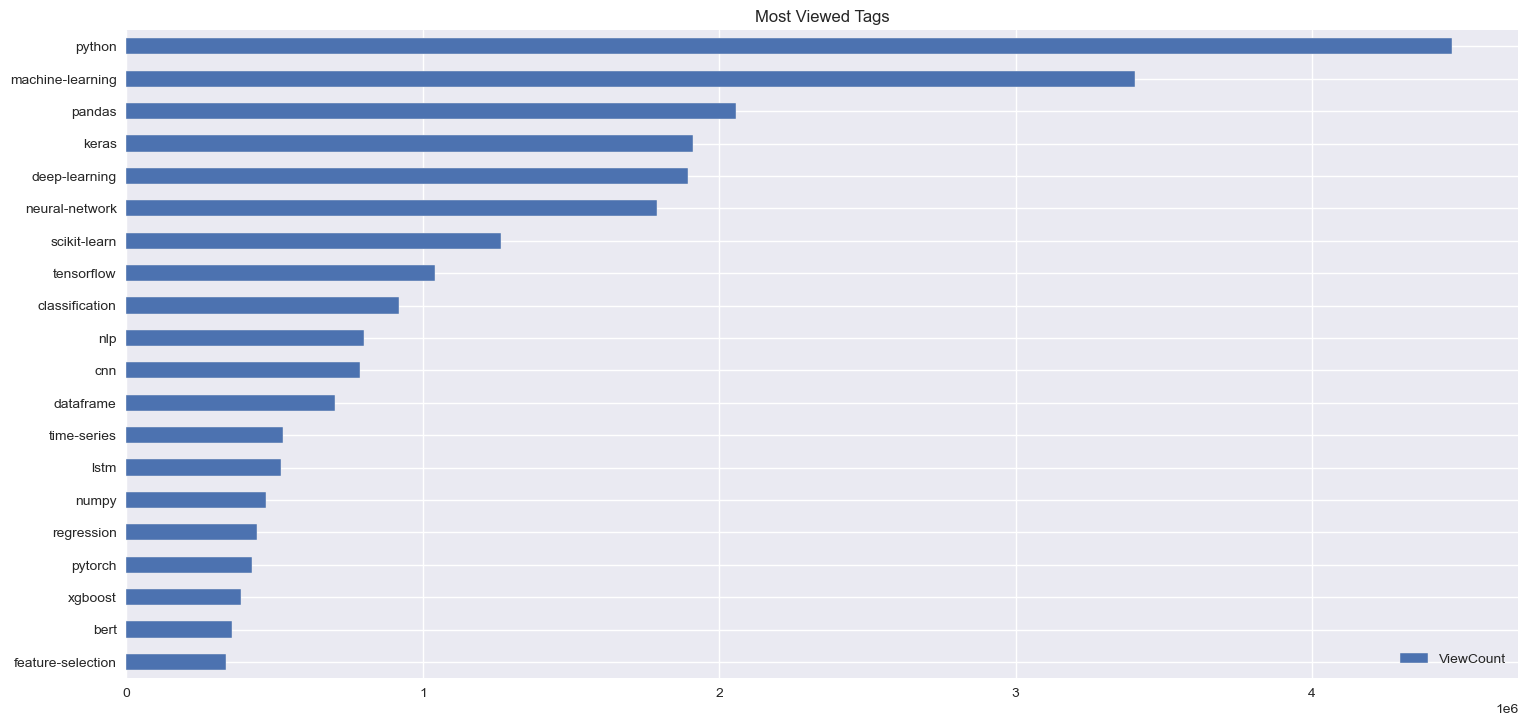

In [201]:
# calculating total views for each tag
tag_view_count = {}

for index, row in data.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_views_df = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_views_df.rename(columns={0: "ViewCount"}, inplace=True)
most_viewed = tag_views_df.sort_values(by="ViewCount").tail(20)
print(most_viewed)
most_viewed.plot(kind="barh", figsize=(16,8))
plt.title('Most Viewed Tags')
plt.show()

## Relations Between Tags

From the graphs above we can see that they are mostly the same, both include tags like `python`, `machine-learning`, `pandas`, `keras` etc. Next we are going to look at what tags are most used, but not most viewed, or vice versa.

In [186]:
used_not_viewed = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
viewed_not_used = pd.merge(most_viewed, most_used, how="left", left_index=True, right_index=True)

#### Most used but not viewed

In [187]:
print(used_not_viewed)

                     Count  ViewCount
data-mining            172        NaN
feature-selection      176   334418.0
r                      194        NaN
predictive-modeling    211        NaN
clustering             229        NaN
dataset                245        NaN
regression             270   438801.0
lstm                   287   521805.0
pandas                 315  2055943.0
time-series            333   528089.0
cnn                    378   787333.0
tensorflow             409  1042457.0
nlp                    443   801379.0
scikit-learn           447  1264088.0
classification         576   918989.0
keras                  700  1911659.0
neural-network         820  1791146.0
deep-learning          893  1896207.0
python                1439  4473117.0
machine-learning      2124  3402958.0


We can see that tags that have a null value in ViewCount are most used, but not most viewed. This means that tags `data-mining`, `r`, `predictive-modeling`, `clustering` and `dataset` are most used, but not most viewed.

#### Most viewed but not used

In [188]:
print(viewed_not_used)

                   ViewCount   Count
feature-selection     334418   176.0
bert                  357418     NaN
xgboost               385764     NaN
pytorch               421984     NaN
regression            438801   270.0
numpy                 470925     NaN
lstm                  521805   287.0
time-series           528089   333.0
dataframe             704528     NaN
cnn                   787333   378.0
nlp                   801379   443.0
classification        918989   576.0
tensorflow           1042457   409.0
scikit-learn         1264088   447.0
neural-network       1791146   820.0
deep-learning        1896207   893.0
keras                1911659   700.0
pandas               2055943   315.0
machine-learning     3402958  2124.0
python               4473117  1439.0


We can see that tags that have a null value in ViewCount are most  viewed, but not most used. This means that tags `bert`, `xgboost`, `pytorch`, `numpy` and `dataframe` are most viewed, but not most used.

A lot of tags have some sort of relation, like `pandas` is related to `python`, because pandas is a Python library. Some have no relation, for example `pandas` and `r` are not related, because pandas is not an R library. Let's take a closer look at tag relations.

In [189]:
#creating dataframe for tags
all_tags = list(tag_count)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4, 0:4]

,deep-learning,cnn,lstm,python
deep-learning,NaN,NaN,NaN,NaN
cnn,NaN,NaN,NaN,NaN
lstm,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN


In [202]:
associations = associations.fillna(0)

for tags in data['Tags']:
    associations.loc[tags, tags] += 1

relations_most_used = associations.loc[most_used.index, most_used.index]

To make the relations above more clear, lets create a heatmap.

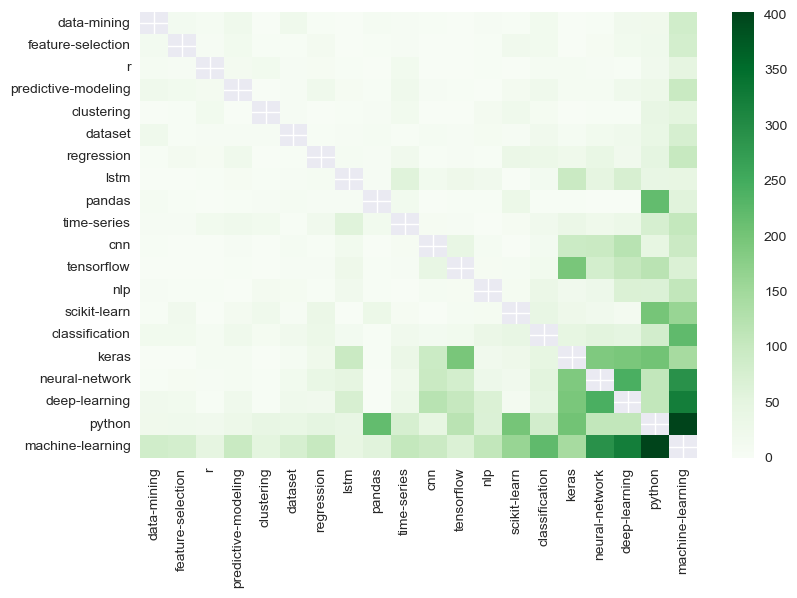

In [191]:
import seaborn as sns
import numpy as np

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN
    
sns.heatmap(relations_most_used, cmap="Greens")
plt.show()

From above we can see that the heatmap is darkest on the lower right corner, where are also all the most used tags. This could be because each of these tags are used a lot and end up being used without having any strong relation between them.

## All questions

Before making any suggestions about what to write, we are going to download another dataset with all questions with the following SQL query:
<pre>
    SELECT Id, CreationDate, Tags
    FROM posts
    WHERE PostTypeId = 1;
</pre>

Especially, we want to look whether the interest in deep learning is increasing or decreasing over years.

In [192]:
all_questions = pd.read_csv('Queryresults_questions.csv', parse_dates = ['CreationDate'])
#replacing tags as previously
all_questions['Tags'] = all_questions['Tags'].str.strip("<>").str.split("><")

We are going to find all the questions that have the following tags, which are related to deep learning: `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`. All of these can be found from the heatmap above, meaning that they are used a lot.

In [193]:
#function that assigns 1 or 0 if deep learning
def deep_learning_question(tags):
    dl_list = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
    for tag in tags:   
        if tag in dl_list:
            return 1
        else:
            return 0

all_questions['dl_question'] = all_questions['Tags'].apply(deep_learning_question)
print(all_questions.sample(5))

           Id        CreationDate  \
8107   126653 2024-01-30 23:17:08   
1860    11793 2016-05-16 18:59:01   
32758   88459 2021-01-25 16:26:49   
19156   18810 2017-05-07 10:53:26   
33719    9959 2016-01-26 01:51:21   

                                                    Tags  dl_question  
8107   [cnn, pytorch, object-detection, image-segment...            1  
1860                                [recommender-system]            0  
32758  [machine-learning, data-cleaning, feature-engi...            0  
19156          [machine-learning, neural-network, keras]            0  
33719                 [machine-learning, neural-network]            0  


In [194]:
#interest before 2024
all_questions = all_questions[all_questions['CreationDate'].dt.year < 2024]
all_dl_questions = all_questions[all_questions['dl_question'] == 1]
print(all_dl_questions.sample(5))

          Id        CreationDate  \
17883  64703 2019-12-12 14:13:09   
27138  51889 2019-05-13 13:29:03   
2297   11979 2016-05-29 03:01:37   
15316  31936 2018-05-21 15:08:38   
16343  77960 2020-07-19 14:02:11   

                                                    Tags  dl_question  
17883               [deep-learning, machine-translation]            1  
27138            [deep-learning, regression, statistics]            1  
2297   [neural-network, deep-learning, distributed, t...            1  
15316             [neural-network, keras, r, tensorflow]            1  
16343  [deep-learning, multilabel-classification, lab...            1  


In [195]:
years = all_dl_questions['CreationDate'].dt.year
all_dl_questions = all_dl_questions.drop(columns=['CreationDate'])
all_dl_questions['Year'] = years.values

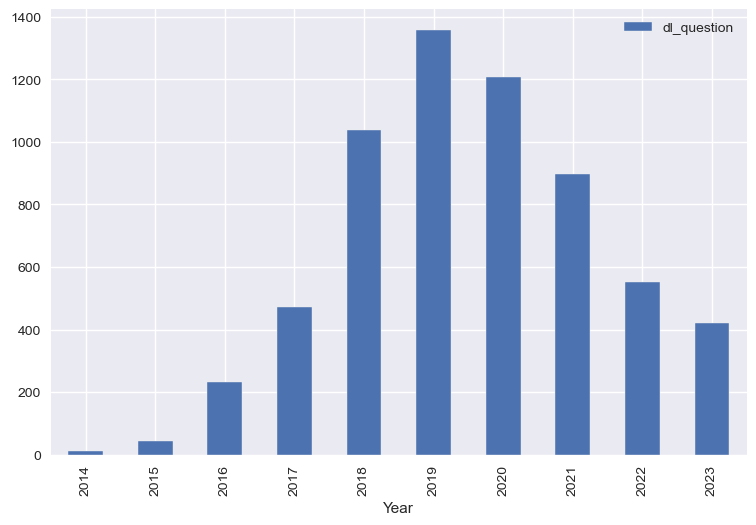

In [196]:
annual_dl_count = pd.DataFrame(all_dl_questions.groupby('Year')['dl_question'].count())
annual_dl_count.plot(kind='bar')
plt.show()

From the graph above we can see that deep learning trend seems to be decreasing. However this could be just because there are less questions asked overall. Because of this, let's calculate the annual percentages for questions asked, to see how many of them were about deep learning.

In [197]:
all_non_dl_questions = all_questions[all_questions['dl_question'] == 0]
non_dl_years = all_non_dl_questions['CreationDate'].dt.year
all_non_dl_questions = all_non_dl_questions.drop(columns=['CreationDate'])
all_non_dl_questions['Year'] = non_dl_years.values

In [198]:
annual_non_dl_count = pd.DataFrame(all_non_dl_questions.groupby('Year')['dl_question'].count().reset_index())
annual_non_dl_count.rename(columns={'dl_question': 'non_dl_question'}, inplace=True)
annual_questions_count = pd.merge(annual_non_dl_count, annual_dl_count, on='Year')
annual_questions_count['dl_pct'] = annual_questions_count['dl_question']/(annual_questions_count['non_dl_question']+annual_questions_count['dl_question'])
print(annual_questions_count)

   Year  non_dl_question  dl_question    dl_pct
0  2014              548           11  0.019678
1  2015             1118           43  0.037037
2  2016             1878          234  0.110795
3  2017             2444          472  0.161866
4  2018             4278         1039  0.195411
5  2019             5383         1356  0.201217
6  2020             4920         1208  0.197128
7  2021             3813          896  0.190274
8  2022             2834          553  0.163271
9  2023             2175          422  0.162495


## Deep learning trend

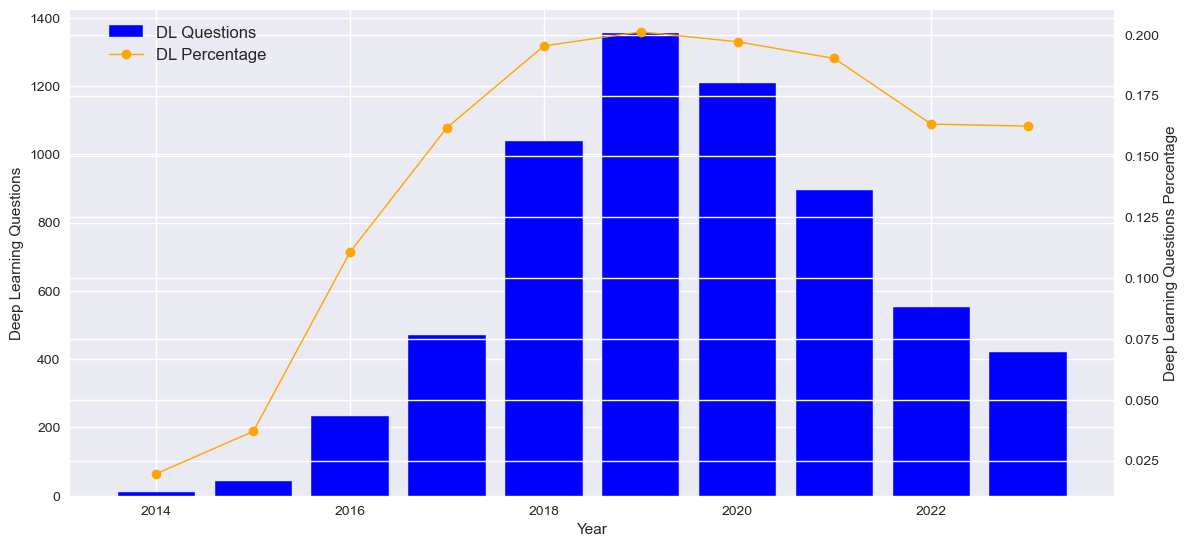

In [199]:
fig, ax1 = plt.subplots(figsize=(12,6))

#bar for dl questions
ax1.bar(annual_questions_count['Year'], annual_questions_count['dl_question'],color='blue', label = 'DL Questions')
ax1.set_xlabel('Year')
ax1.set_ylabel('Deep Learning Questions')


ax2 = ax1.twinx()
ax2.plot(annual_questions_count['Year'], annual_questions_count['dl_pct'], color = 'orange',linewidth=1, marker="o", label = 'DL Percentage')
ax2.set_ylabel('Deep Learning Questions Percentage')

fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.88), fontsize='large')


plt.show()

It looks like DL Questions trend has decreased a little bit, but not as much as the count of dl questions implied. The amount of questions overall is decreasing, while the percentage of deep learning questions is still fairly high. This means that writing about deep learning should be a great option.